# Visualization of results for the Basque case study

In [173]:
import matplotlib.pyplot as plt  
import yaml
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd

In [174]:
case_study_name = "testing_2025-02-04_09-47-02"
input_file_name = "transport_data_years_v63.yaml"

current_path = os.getcwd()
print("Current path:", current_path)
file_results = os.path.normpath(current_path + "/results")
print("File results:", os.path.normpath(file_results))
file_path = os.path.join(current_path, "/results")
print(file_path)
# Normalize the path
normalized_path = os.path.normpath(file_path)
print("Normalized path:", normalized_path)

Current path: c:\Users\Antonia\Documents\Github\iDesignRES3.0\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Users\Antonia\Documents\Github\iDesignRES3.0\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results


In [175]:
checked_path = os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")
if os.path.exists(checked_path):
    print(f"The path {checked_path} exists.")
else:
    print(f"The path {checked_path} does not exist.")

The path c:\Users\Antonia\Documents\Github\iDesignRES3.0\iDesignRES_transcompmodel\examples\Basque country\results\testing_2025-02-04_09-47-02_budget_penalty_plus_dict.yaml exists.


## Reading input data

In [176]:
folder_input = os.path.normpath(current_path + "/data")
with open(folder_input + "/" + input_file_name) as file:
    input_data = yaml.safe_load(file)

## Reading output data

In [177]:
# with open(os.path.normpath(file_results + "/" + case_study_name + "_n_fueling_dict.yaml")) as file:
#     n_fueling_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_dict.yaml")) as file:
    budget_penalty_minus_dict = yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")) as file:
    budget_penalty_plus_dict= yaml.safe_load(file)

# with open(os.path.normpath(file_results + "/" + case_study_name + "_detour_time_dict.yaml")) as file:
#     detour_time_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_f_dict.yaml")) as file:
    f_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_dict.yaml")) as file:
    h_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_exist_dict.yaml")) as file:
    h_exist_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_minus_dict.yaml")) as file:
    h_minus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_plus_dict.yaml")) as file:
    h_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_dict.yaml")) as file:
    q_fuel_infr_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_q_mode_infr_plus_dict.yaml")) as file:
    q_mode_infr_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_s.yaml")) as file:
    s_dict= yaml.safe_load(file)



In [178]:
def process_key(key):
    # Convert string key to a tuple
    return safe_tuple_parser(key)

def process_value(value):
    # Convert string value to float
    return float(value)

def safe_tuple_parser(key):
    """
    Safely parses string representations of nested tuples into actual Python tuples.
    Example: "(2024, (1, 7, 0), (1, 8), 2024)" -> (2024, (1, 7, 0), (1, 8), 2024)
    """
    import ast  # Abstract Syntax Tree module for safe literal evaluation

    # Remove outer quotes if present and use `ast.literal_eval`
    try:
        return ast.literal_eval(key)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Failed to parse key: {key}") from e



budget_penalty_minus = {process_key(key): process_value(value) for key, value in budget_penalty_minus_dict.items()}
budget_penalty_plus = {process_key(key): process_value(value) for key, value in budget_penalty_plus_dict.items()}
#detour_time = {process_key(key): process_value(value) for key, value in detour_time_dict.items()}
f = {process_key(key): process_value(value) for key, value in f_dict.items()}
h = {process_key(key): process_value(value) for key, value in h_dict.items()}
h_exist = {process_key(key): process_value(value) for key, value in h_exist_dict.items()}
h_minus = {process_key(key): process_value(value) for key, value in h_minus_dict.items()}
h_plus = {process_key(key): process_value(value) for key, value in h_plus_dict.items()}
q_fuel_infr_plus = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_dict.items()}
q_mode_infr_plus = {process_key(key): process_value(value) for key, value in q_mode_infr_plus_dict.items()}
s = {process_key(key): process_value(value) for key, value in s_dict.items()}
# n_fueling = {process_key(key): process_value(value) for key, value in n_fueling_dict.items()}


## Visualizations

- cummulative shift (vehicle stock after different types and technologies) (check!)
- shift by income class (check!)
- mode shift (check!)
- infrastructure expansion by year for each technology (check!)
- *impact of route length*

In [179]:
print(input_data.keys())
model_parameters = input_data["Model"]
print(model_parameters)

Y = model_parameters["Y"]
y_init = model_parameters["y_init"]
pre_y = model_parameters["pre_y"]

G = pre_y + Y
g_init = y_init - pre_y
Y_end = y_init + Y - 1


dict_keys(['DetourTimeReduction', 'Edge', 'FinancialStatus', 'Fuel', 'GeographicElement', 'InitDetourTime', 'InitialFuelingInfr', 'InitialModeInfr', 'InitialVehicleStock', 'Initial_Mode_Share', 'Mode', 'Model', 'Node', 'Odpair', 'Path', 'Product', 'Regiontype', 'Speed', 'TechVehicle', 'Technology', 'Vehicletype'])
{'E': 12, 'N': 2, 'Y': 31, 'budget_penalty_minus': 100, 'budget_penalty_plus': 1000, 'gamma': 0.0003, 'goals_no_new_ICEV': {2035: 0.0}, 'goals_tot_BEV': {2030: 230.0}, 'pre_y': 25, 'y_init': 2020}


In [180]:
# print(input_data.keys())
fuel_list = input_data["Fuel"]
mode_list = input_data["Mode"]
techvehicle_list = input_data["TechVehicle"]
odpair_list = input_data["Odpair"]  
financial_status_list = input_data["FinancialStatus"]

od_pair_list_by_year = {}
for y in range(y_init, Y_end + 1):

    od_pair_list_by_year[y] = sum(odpair_list[r]["F"][y - y_init] for r in range(0, 20))


fuel_list = {item["id"]: item for item in fuel_list}
mode_list = {item["id"]: item for item in mode_list}
techvehicle_list = {item["id"]: item for item in techvehicle_list}
odpair_list = {item["id"]: item for item in odpair_list}
financial_status_list = {item["id"]: item for item in financial_status_list}

# calculating for each technology and each year the total cost
def get_vehicle_stock(by_income_class = False, income_class=None):
    techveh_stock = {}

    for tv_id in techvehicle_list:

        for y in range(y_init, Y_end + 1):
            if not by_income_class:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r, tv_id, g) in h.keys())
            else:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys())
            techveh_stock[(y, tv_id)] = total_veh_number
    return techveh_stock

In [181]:
# color palette defintion"
colors_techvehicles = ["#f7b267", "#f4845f", "#f25c54", "#76c893", "#52b69a", "#168aad", "#c0b9dd", "#4f5d75", "#c9ada7", "#9a8c98", "#8e9aaf", "#8b8c89", "#463f3a", "#595959", "#604d53"]

In [182]:
veh_stock = get_vehicle_stock(True, "Commercial")
print(veh_stock)

{(2020, 0): 0, (2021, 0): 0, (2022, 0): 0, (2023, 0): 0, (2024, 0): 0, (2025, 0): 0, (2026, 0): 0, (2027, 0): 0, (2028, 0): 0, (2029, 0): 0, (2030, 0): 0, (2031, 0): 0, (2032, 0): 0, (2033, 0): 0, (2034, 0): 0, (2035, 0): 0, (2036, 0): 0, (2037, 0): 0, (2038, 0): 0, (2039, 0): 0, (2040, 0): 0, (2041, 0): 0, (2042, 0): 0, (2043, 0): 0, (2044, 0): 0, (2045, 0): 0, (2046, 0): 0, (2047, 0): 0, (2048, 0): 0, (2049, 0): 0, (2050, 0): 0, (2020, 1): 0, (2021, 1): 0, (2022, 1): 0, (2023, 1): 0, (2024, 1): 0, (2025, 1): 0, (2026, 1): 0, (2027, 1): 0, (2028, 1): 0, (2029, 1): 0, (2030, 1): 0, (2031, 1): 0, (2032, 1): 0, (2033, 1): 0, (2034, 1): 0, (2035, 1): 0, (2036, 1): 0, (2037, 1): 0, (2038, 1): 0, (2039, 1): 0, (2040, 1): 0, (2041, 1): 0, (2042, 1): 0, (2043, 1): 0, (2044, 1): 0, (2045, 1): 0, (2046, 1): 0, (2047, 1): 0, (2048, 1): 0, (2049, 1): 0, (2050, 1): 0, (2020, 2): 0, (2021, 2): 0, (2022, 2): 0, (2023, 2): 0, (2024, 2): 0, (2025, 2): 0, (2026, 2): 0, (2027, 2): 0, (2028, 2): 0, (2029

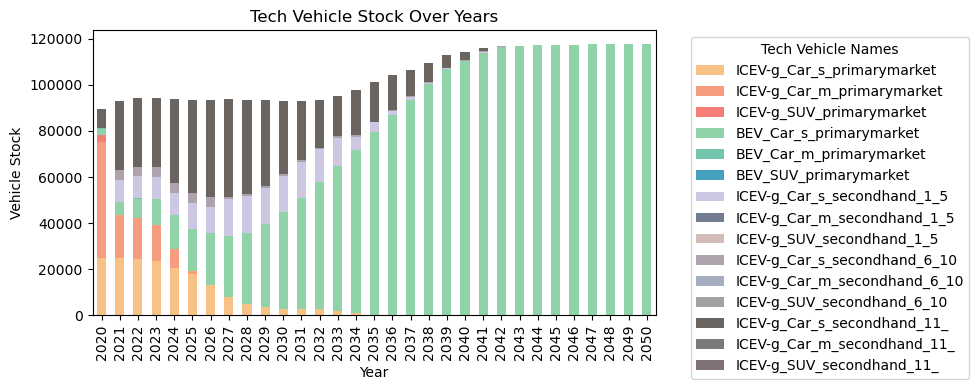

In [183]:
tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
fig, ax = plt.subplots(figsize=(10, 4))

years = range(y_init, Y_end + 1)
tech_ids = list(techvehicle_list.keys())

techveh_stock_all = get_vehicle_stock()

# Prepare data for stacked bar plot
data = {year: [techveh_stock_all.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
df = pd.DataFrame(data, index=tech_ids).T

# Plotting
bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_techvehicles, alpha=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Vehicle Stock')
ax.set_title('Tech Vehicle Stock Over Years')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')
 # plt.legend(title='Tech Vehicle ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [184]:
tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]

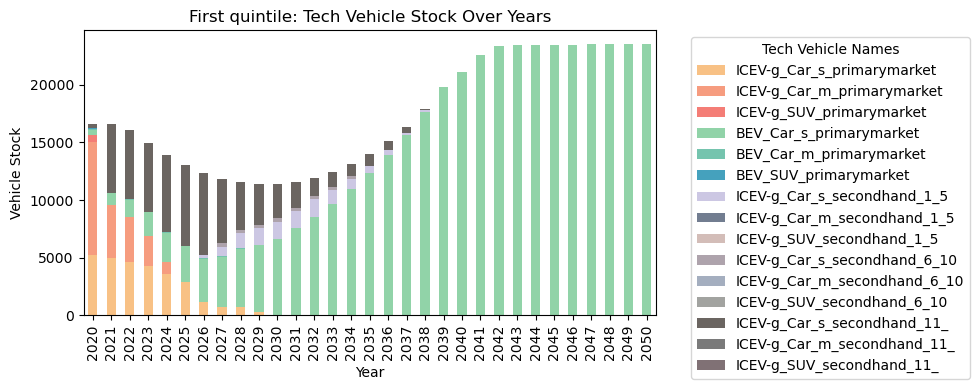

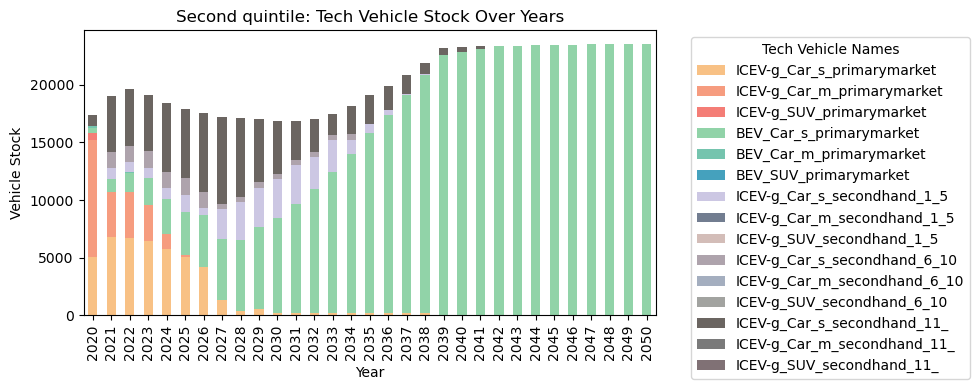

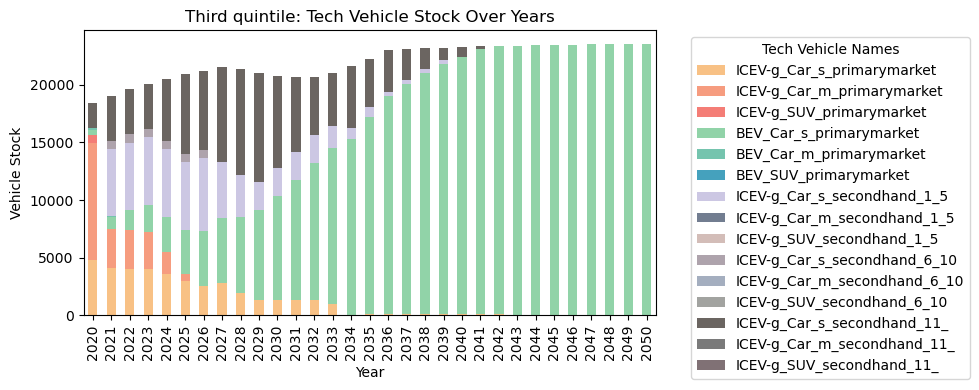

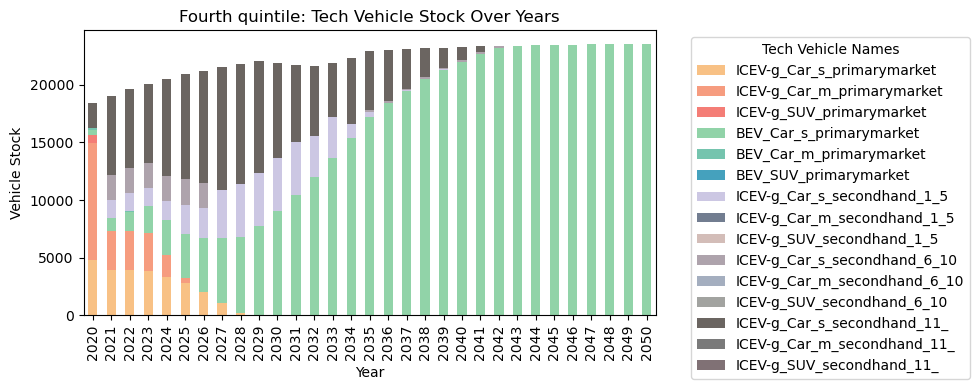

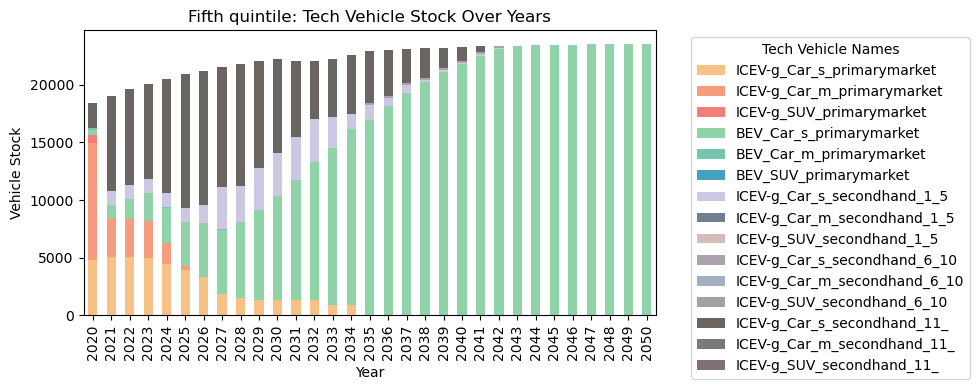

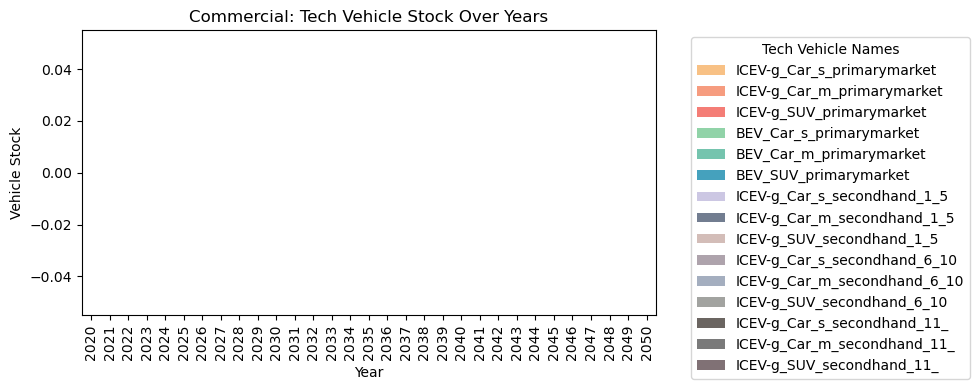

In [185]:
financial_status_list = input_data["FinancialStatus"]
financial_status_list = {item["id"]: item for item in financial_status_list}
for fin in financial_status_list.keys():
    tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
    fig, ax = plt.subplots(figsize=(10, 4))

    years = range(y_init, Y_end + 1)
    tech_ids = list(techvehicle_list.keys())

    techveh_stock_all = get_vehicle_stock(by_income_class=True, income_class=financial_status_list[fin]["name"])

    # Prepare data for stacked bar plot
    data = {year: [techveh_stock_all.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_techvehicles, alpha=0.8)
    ax.set_xlabel('Year')
    ax.set_ylabel('Vehicle Stock')
    ax.set_title(financial_status_list[fin]["name"]+ ': Tech Vehicle Stock Over Years')
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_tech_vehicle_stock_" + financial_status_list[fin]["name"] + ".png"), transparent=True)


## Fueling infrastructure investments

In [186]:
technology_list = input_data["Technology"]
technology_list = {item["id"]: item for item in technology_list}
geographic_element_list = input_data["GeographicElement"]
geographic_element_list = {item["id"]: item for item in geographic_element_list}

fuel_list = input_data["Fuel"]
fuel_list = {item["id"]: item for item in fuel_list}

def get_fuel_infr_plus(by_geographic_element = False, geographic_element=[]):
    q_plus_by_tech = {}

    if not by_geographic_element:
        geographic_element = geographic_element_list.keys()
    
    for f in fuel_list.keys():
        for y in range(y_init, Y_end + 1):
            total_expansion_per_y = sum(q_fuel_infr_plus[(y0, f, e)] for y0 in range(y_init, y+1) for e in geographic_element if (y0, f, e) in q_fuel_infr_plus.keys())
            q_plus_by_tech[(y, f)] = total_expansion_per_y
    return q_plus_by_tech

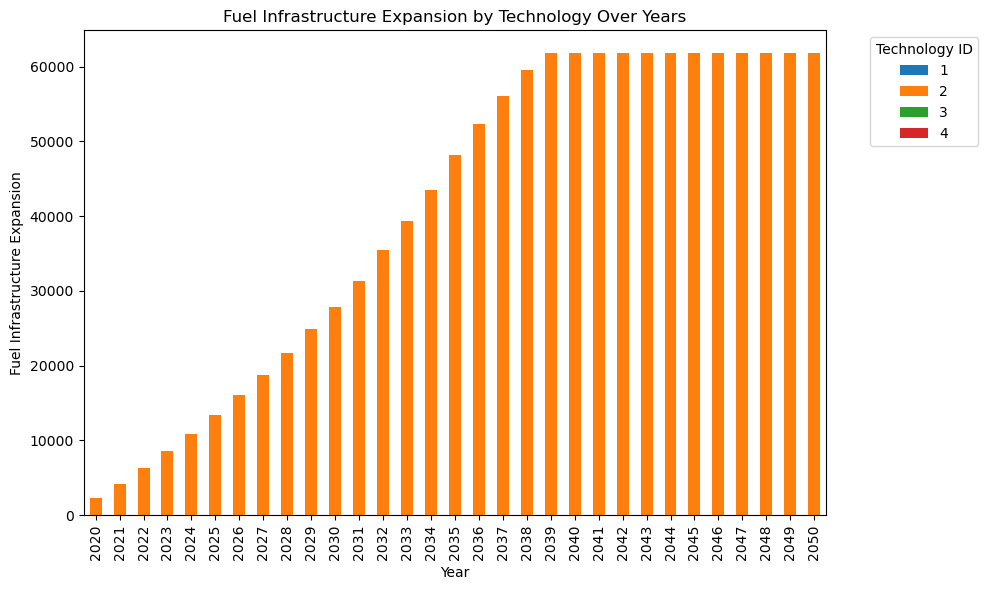

In [187]:
q_plus_by_tech = get_fuel_infr_plus()

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
tech_ids = list(technology_list.keys())

# Prepare data for stacked bar plot
data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
df = pd.DataFrame(data, index=tech_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Fuel Infrastructure Expansion')
ax.set_title('Fuel Infrastructure Expansion by Technology Over Years')
plt.legend(title='Technology ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

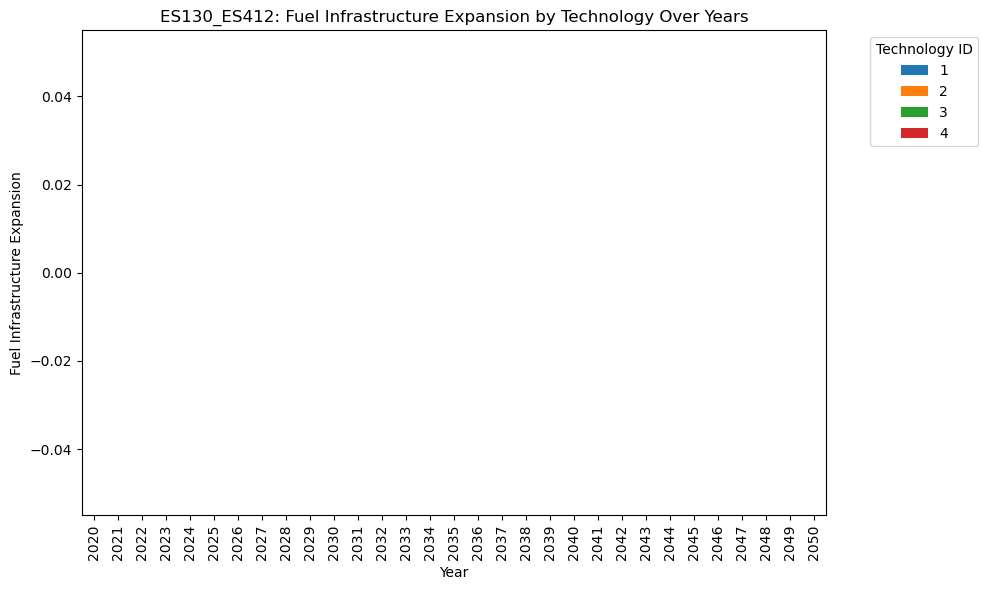

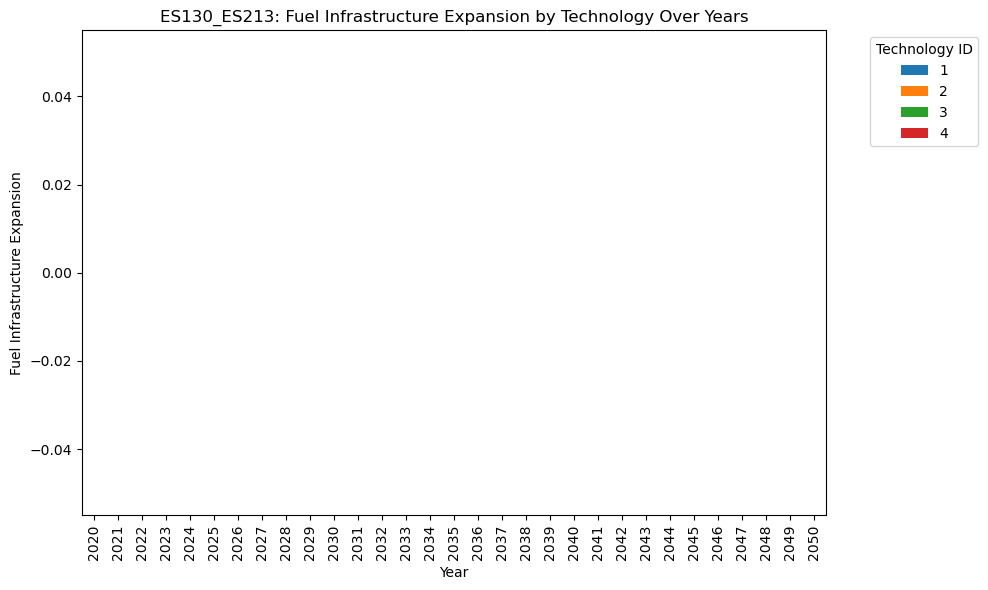

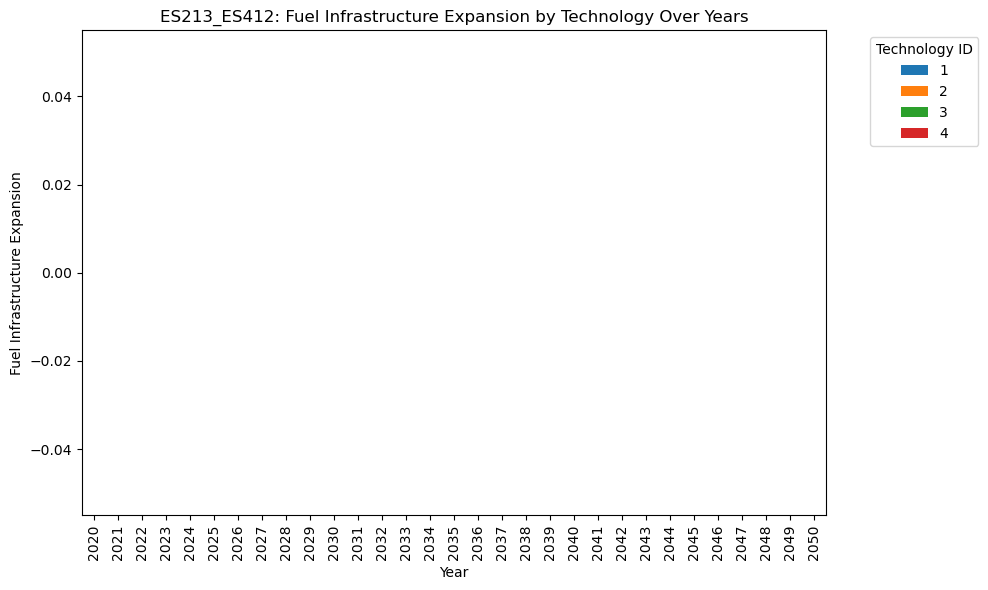

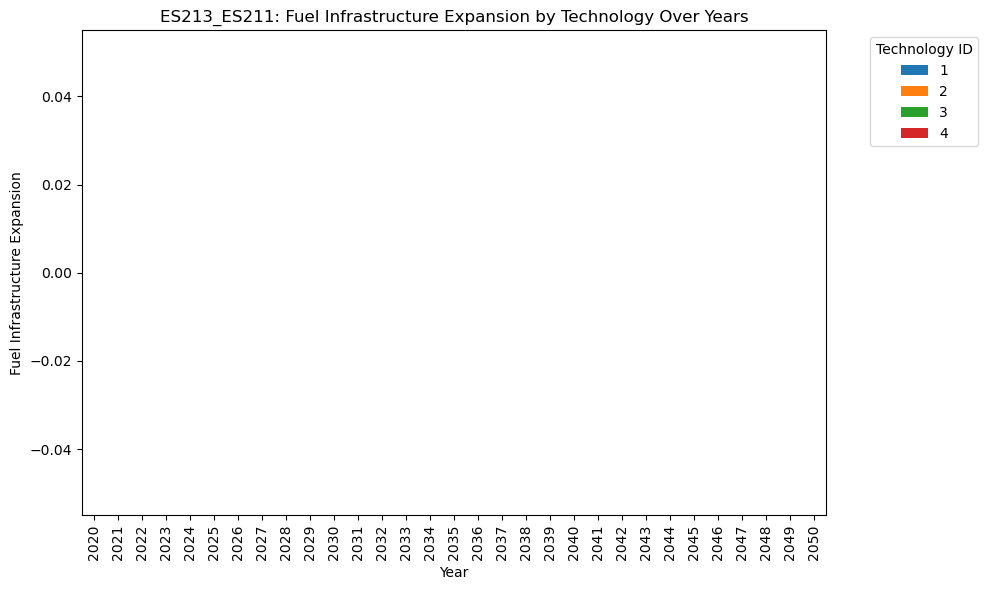

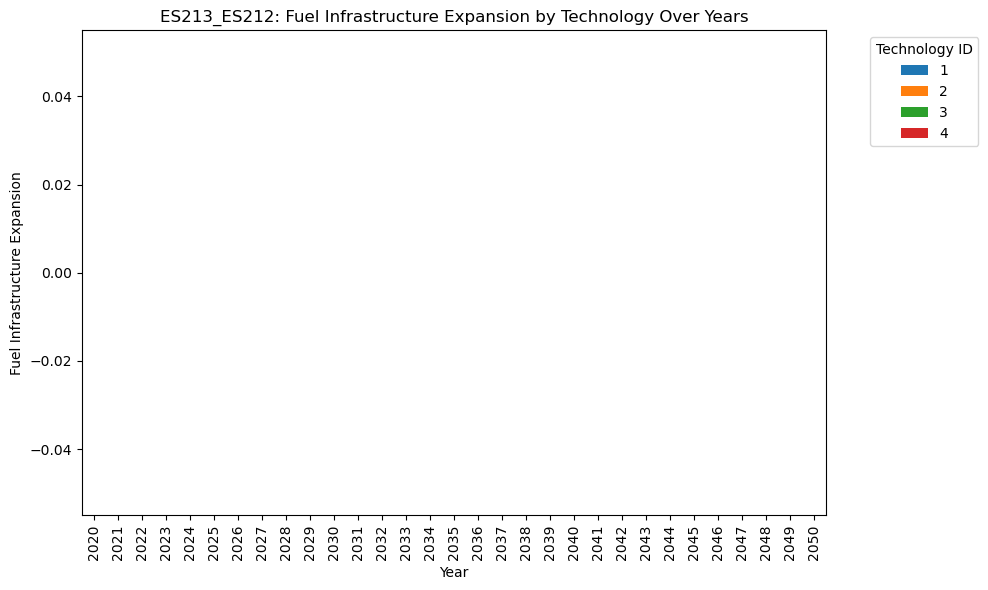

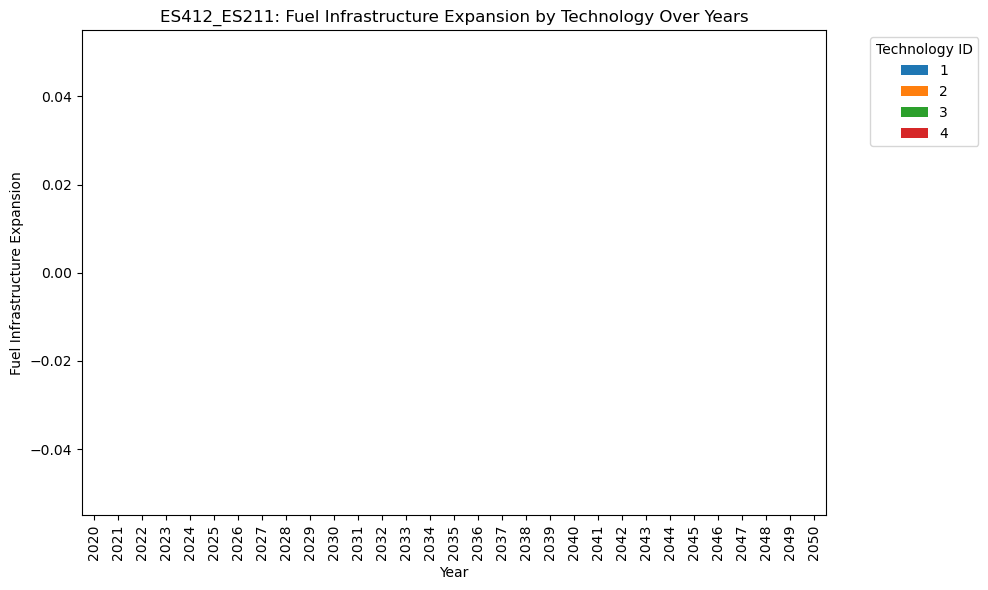

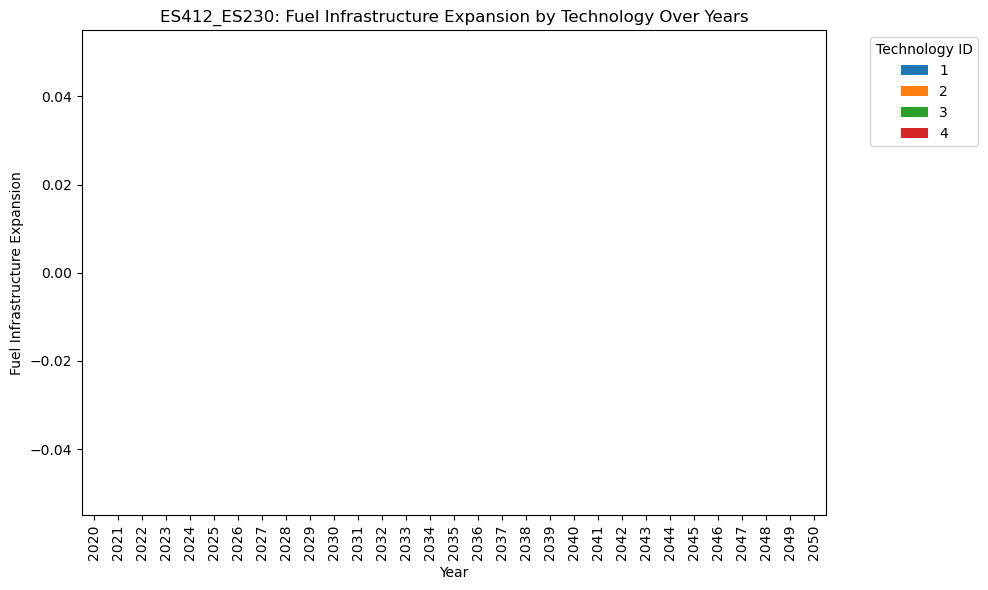

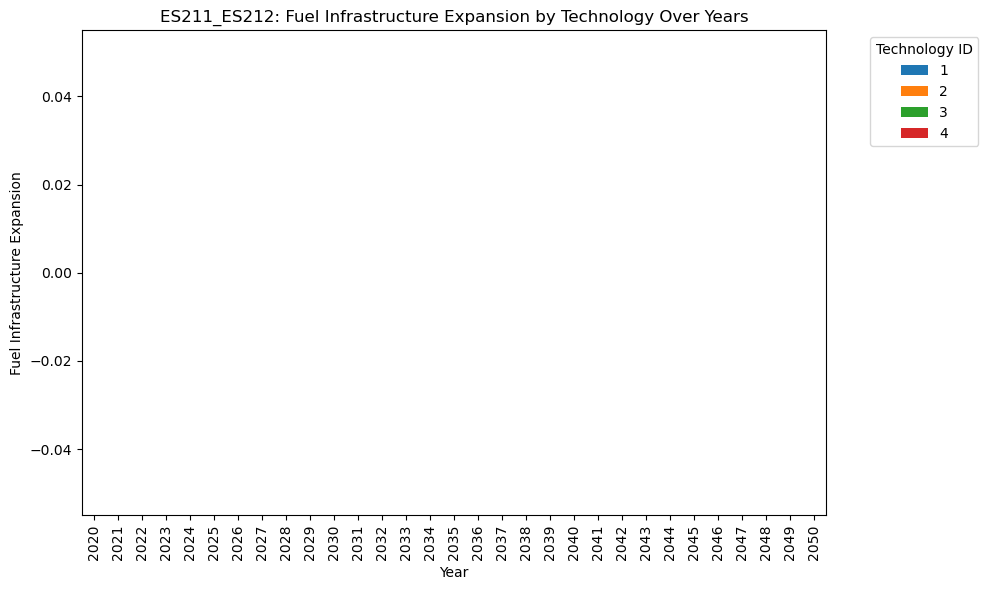

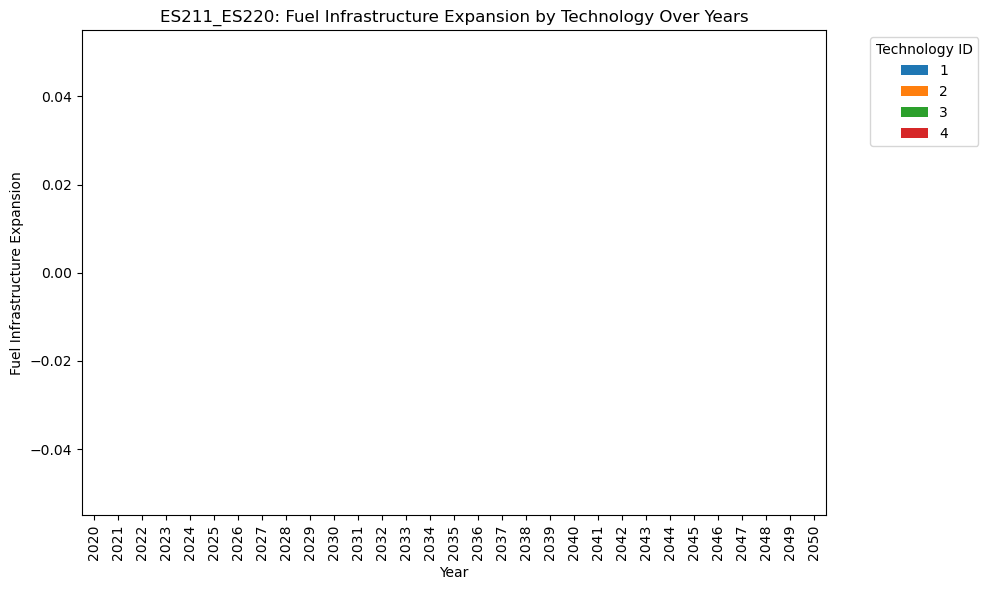

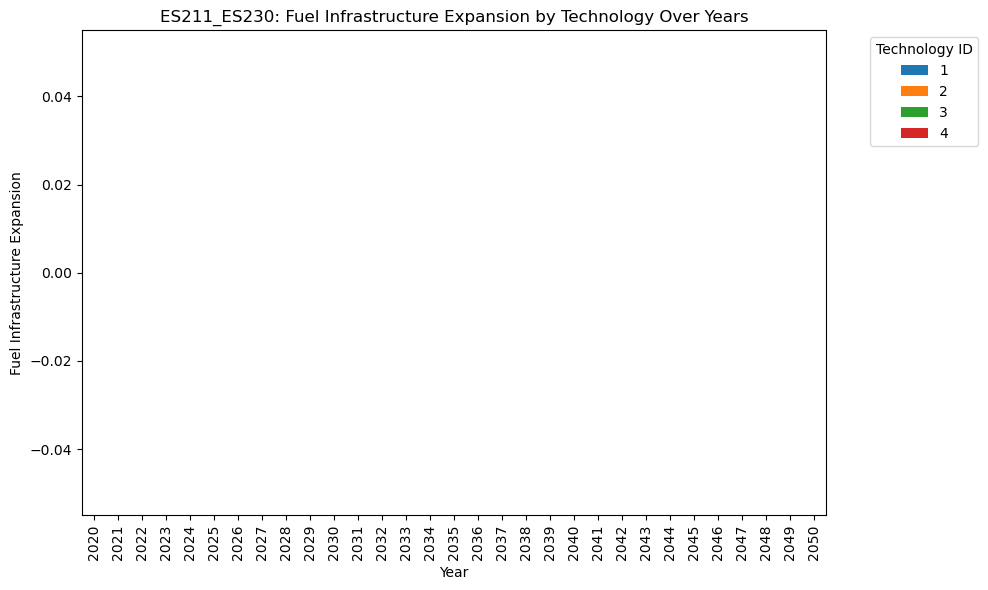

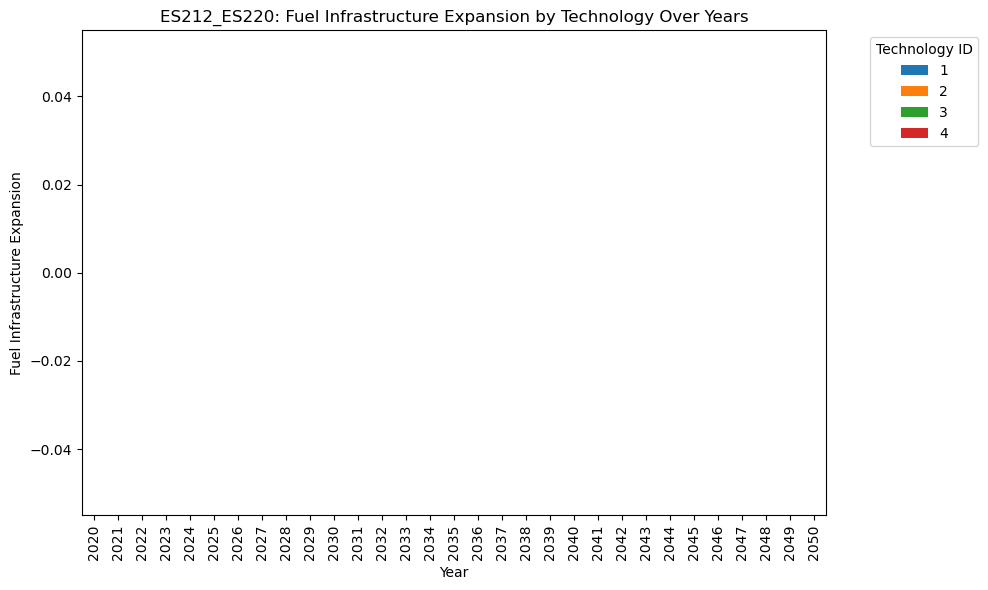

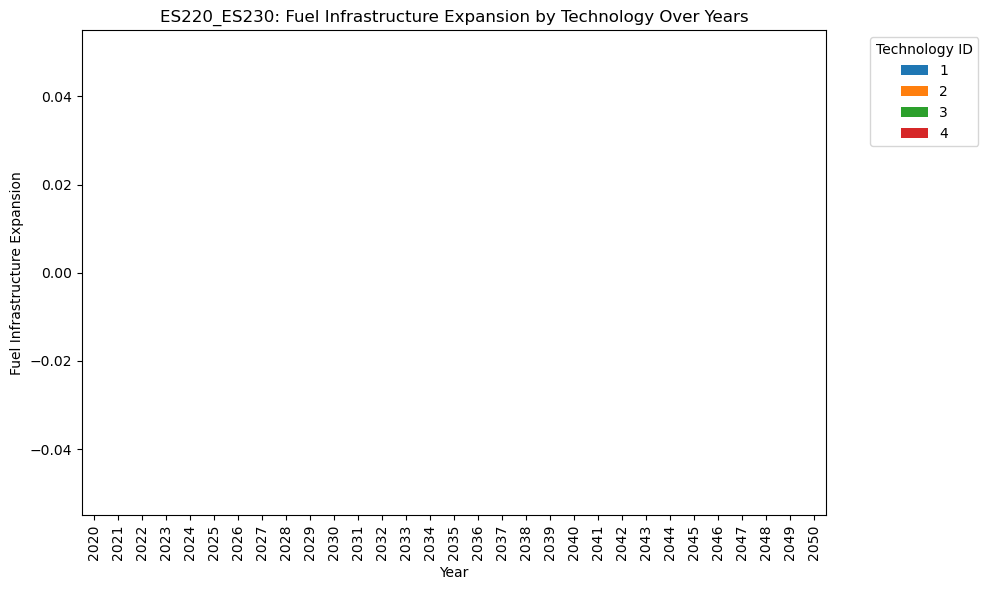

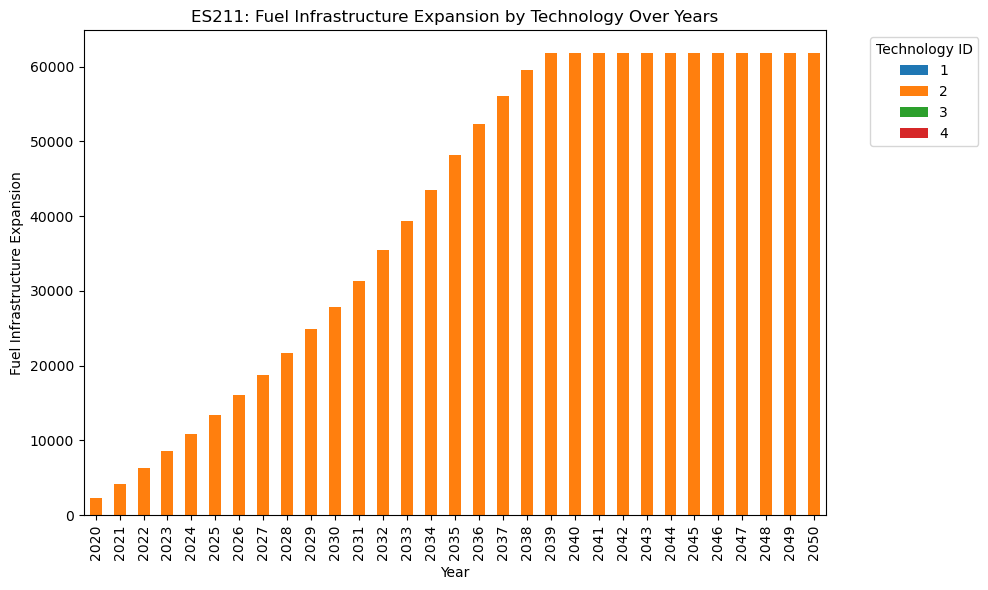

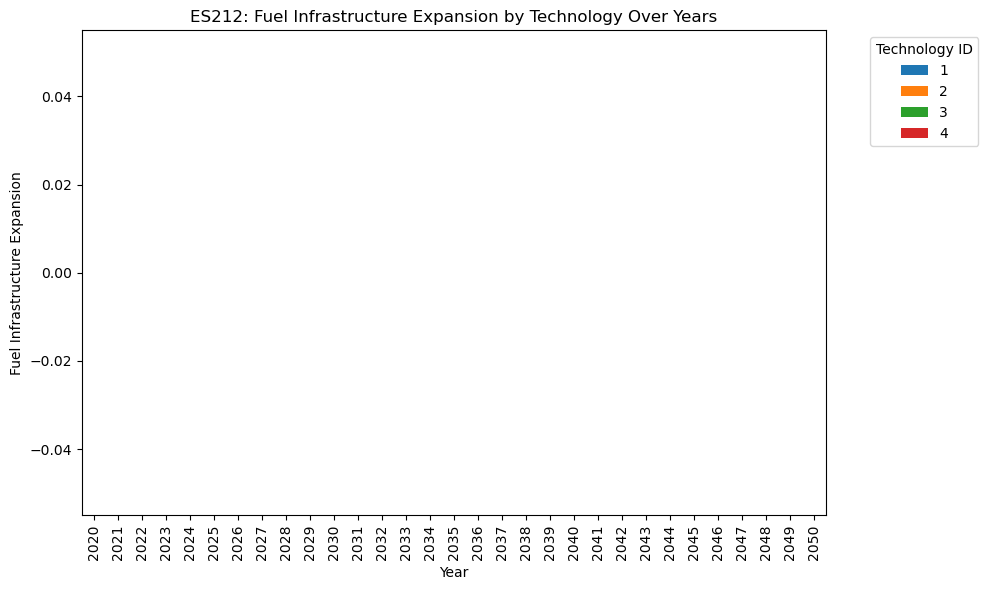

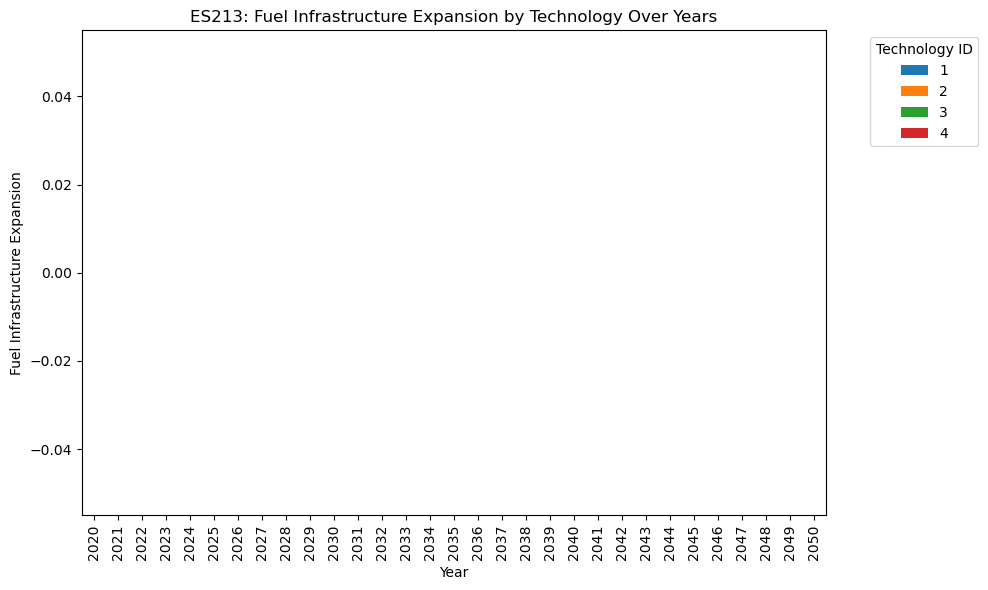

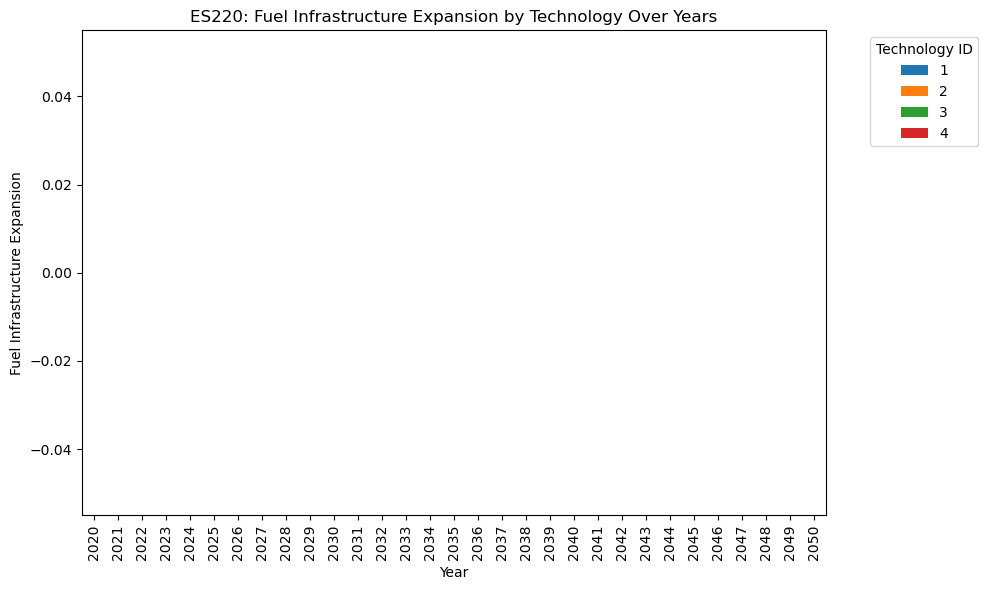

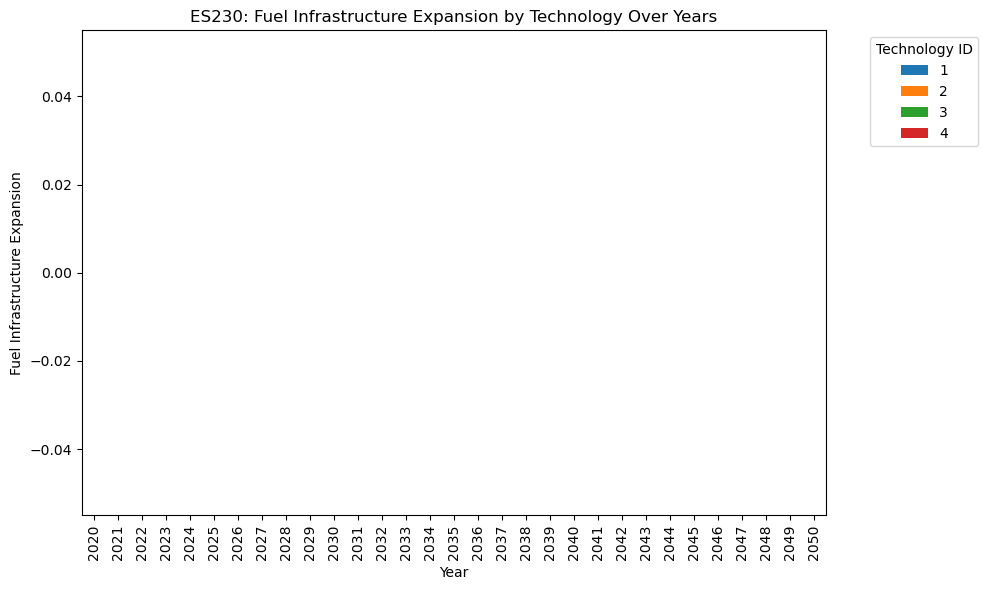

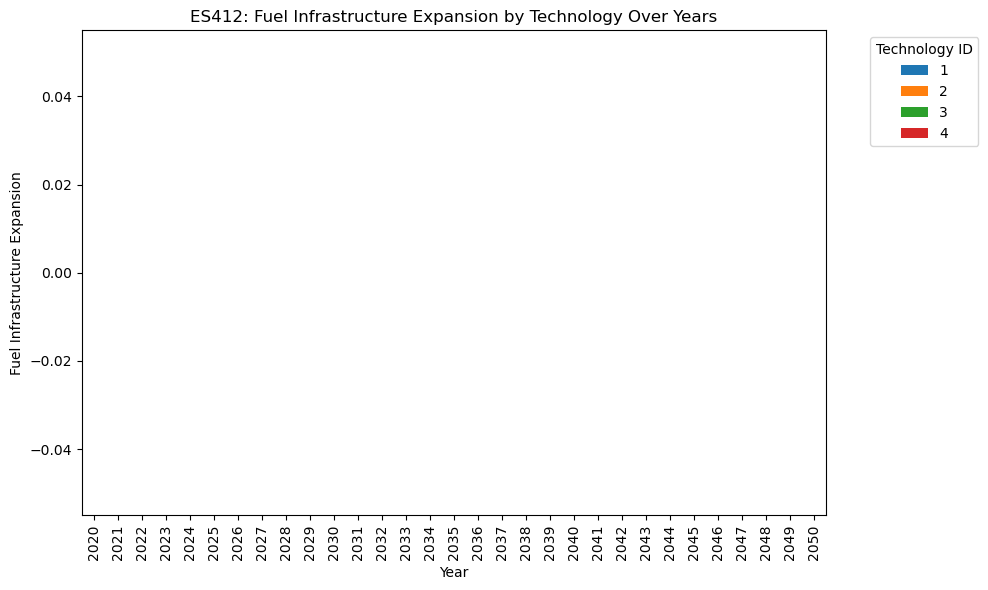

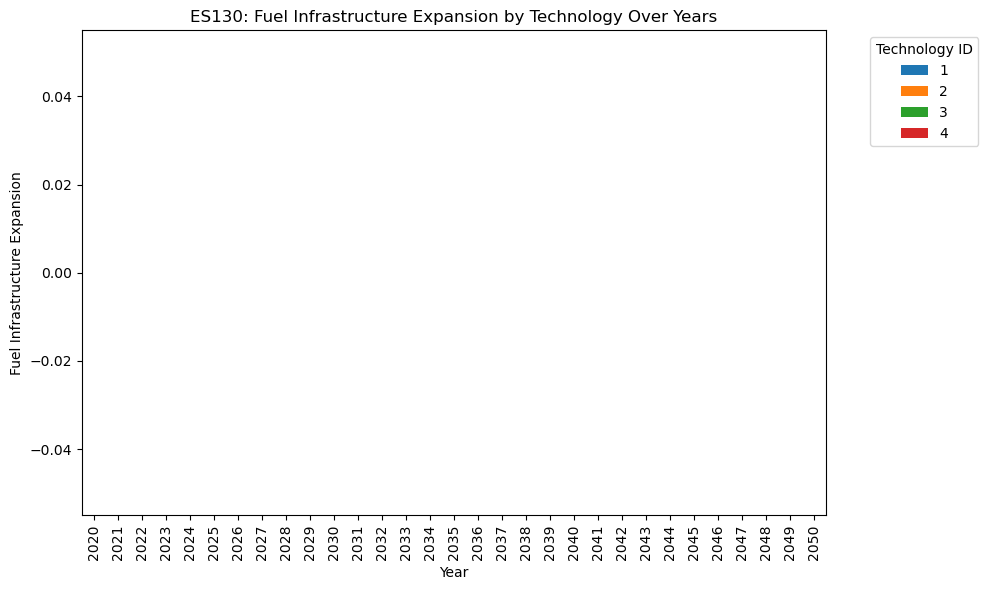

In [188]:
# for each geom_item

geometric_element_list = input_data["GeographicElement"]

geometric_element_list = {item["id"]: item for item in geometric_element_list}

for e in geographic_element_list.keys():
    q_plus_by_tech = get_fuel_infr_plus(True, [e])

    fig, ax = plt.subplots(figsize=(10, 6))

    years = range(y_init, Y_end + 1)
    tech_ids = list(technology_list.keys())

    # Prepare data for stacked bar plot
    data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    df.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('Fuel Infrastructure Expansion')
    ax.set_title(str(geographic_element_list[e]["name"]) + ': Fuel Infrastructure Expansion by Technology Over Years')
    plt.legend(title='Technology ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [189]:
# installed cap per e 

geometric_element_list = input_data["GeographicElement"]

geometric_element_list = {item["id"]: item for item in geometric_element_list}
for e in geographic_element_list.keys():
    for fuel in fuel_list.keys():
        total_expansion_per_y = sum(q_fuel_infr_plus[(y, fuel, e)] for y in range(y_init, Y_end+1) if (y, fuel, e) in q_fuel_infr_plus.keys())
        if geographic_element_list[e]["name"] in ["ES213", "ES211", "ES212"]:
            print(geographic_element_list[e]["name"], fuel_list[fuel]["name"], total_expansion_per_y)


ES211 diesel 0.0
ES211 electricity 61767.138195
ES212 diesel 0.0
ES212 electricity 0.0
ES213 diesel 0.0
ES213 electricity 0.0


In [190]:
def get_s_per_year_and_tech(tech_id_list = ["diesel", "electricity"]):
    s_per_year_and_tech = {}

    for t in tech_id_list:
        for y in range(y_init, Y_end + 1):
            total_s_per_y = sum(s[(y, (1, r, odpair_list[r]["path_id"], e), tv)] for r in odpair_list.keys() for tv in technology_list.keys() for e in geographic_element_list.keys() if (y, (1, r, odpair_list[r]["path_id"], e), tv) in s.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in (tech_id_list))
            s_per_year_and_tech[(y, t)] = total_s_per_y
    return s_per_year_and_tech


In [191]:
energy_fueled_diesel = get_s_per_year_and_tech(tech_id_list=["diesel"])
energy_fueled_electricity = get_s_per_year_and_tech(tech_id_list=["electricity"])
print(energy_fueled_diesel)
print(energy_fueled_electricity)

{(2020, 'diesel'): 460198569.35471797, (2021, 'diesel'): 158065466.525764, (2022, 'diesel'): 151220574.13362598, (2023, 'diesel'): 131227735.171332, (2024, 'diesel'): 68679896.021841, (2025, 'diesel'): 12360289.657218, (2026, 'diesel'): 0.0, (2027, 'diesel'): 0.0, (2028, 'diesel'): 0.0, (2029, 'diesel'): 0.0, (2030, 'diesel'): 0.0, (2031, 'diesel'): 0.0, (2032, 'diesel'): 0.0, (2033, 'diesel'): 0.0, (2034, 'diesel'): 0.0, (2035, 'diesel'): 0.0, (2036, 'diesel'): 0.0, (2037, 'diesel'): 0.0, (2038, 'diesel'): 0.0, (2039, 'diesel'): 0.0, (2040, 'diesel'): 0.0, (2041, 'diesel'): 0.0, (2042, 'diesel'): 0.0, (2043, 'diesel'): 0.0, (2044, 'diesel'): 0.0, (2045, 'diesel'): 0.0, (2046, 'diesel'): 0.0, (2047, 'diesel'): 0.0, (2048, 'diesel'): 0.0, (2049, 'diesel'): 0.0, (2050, 'diesel'): 0.0}
{(2020, 'electricity'): 7294571.185685, (2021, 'electricity'): 13935527.971486, (2022, 'electricity'): 21254241.399586998, (2023, 'electricity'): 28689436.944095, (2024, 'electricity'): 36298421.426379, (20

In [192]:
# check total investments per technology
data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids if tech_id == 1] for year in years}
print(data)


{2020: [0.0], 2021: [0.0], 2022: [0.0], 2023: [0.0], 2024: [0.0], 2025: [0.0], 2026: [0.0], 2027: [0.0], 2028: [0.0], 2029: [0.0], 2030: [0.0], 2031: [0.0], 2032: [0.0], 2033: [0.0], 2034: [0.0], 2035: [0.0], 2036: [0.0], 2037: [0.0], 2038: [0.0], 2039: [0.0], 2040: [0.0], 2041: [0.0], 2042: [0.0], 2043: [0.0], 2044: [0.0], 2045: [0.0], 2046: [0.0], 2047: [0.0], 2048: [0.0], 2049: [0.0], 2050: [0.0]}


In [193]:
# check tech_shift 
def get_f_per_tech(tech_id_list = ["diesel", "electricity"]):
    f_per_tech_and_year = {}
    for t in tech_id_list:
        for y in range(y_init, Y_end + 1):
            total_activity_per_tech = sum(f[(y, (1, r, odpair_list[r]["path_id"]), (1, tv), g)] for r in odpair_list.keys() for tv in techvehicle_list.keys() for g in range(g_init, y + 1) if (y, (1, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in tech_id_list)
            f_per_tech_and_year[(y, t)] = total_activity_per_tech
    return f_per_tech_and_year

In [194]:
f_per_tech_diesel = get_f_per_tech(tech_id_list=["diesel"])
f_per_tech_electricity = get_f_per_tech(tech_id_list=["electricity"])
print(f_per_tech_diesel)
print(f_per_tech_electricity)

{(2020, 'diesel'): 63079439.335005, (2021, 'diesel'): 63748769.097941004, (2022, 'diesel'): 62780444.089229, (2023, 'diesel'): 60413562.472921, (2024, 'diesel'): 57700017.802215, (2025, 'diesel'): 54893883.140968, (2026, 'diesel'): 51942691.375779, (2027, 'diesel'): 49118000.00533, (2028, 'diesel'): 45664328.663641, (2029, 'diesel'): 41826180.081224, (2030, 'diesel'): 37435754.964095, (2031, 'diesel'): 32652518.204588, (2032, 'diesel'): 27902021.522978, (2033, 'diesel'): 23625155.035944, (2034, 'diesel'): 19797613.492595, (2035, 'diesel'): 16132912.18722, (2036, 'diesel'): 12755773.818968, (2037, 'diesel'): 9657635.03417, (2038, 'diesel'): 6818285.519044, (2039, 'diesel'): 4538098.109312, (2040, 'diesel'): 3085681.393817, (2041, 'diesel'): 1470866.550198, (2042, 'diesel'): 430488.430659, (2043, 'diesel'): 0.0, (2044, 'diesel'): 0.0, (2045, 'diesel'): 0.0, (2046, 'diesel'): 0.0, (2047, 'diesel'): 0.0, (2048, 'diesel'): 0.0, (2049, 'diesel'): 0.0, (2050, 'diesel'): 0.0}
{(2020, 'electric

In [195]:
def get_f_by_mode(mode_list=[1, 2]):
    f_per_mode = {}
    for m in mode_list:
        for y in range(y_init, Y_end + 1):
            total_activity_per_tech = sum(f[(y, (1, r, odpair_list[r]["path_id"]), (m, tv), g)] for r in odpair_list.keys() for tv in range(1, max(techvehicle_list.keys()) + 2) for g in range(g_init, y + 1) if (y, (1, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys())
            f_per_mode[(y, m)] = total_activity_per_tech
    return f_per_mode

In [196]:
f_per_mode_1 = get_f_by_mode(mode_list=[1])
f_per_mode_2 = get_f_by_mode(mode_list=[2])
print(f_per_mode_1)
print(f_per_mode_2)


{(2020, 1): 47161684.359064996, (2021, 1): 49665513.251171, (2022, 1): 51202296.882468, (2023, 1): 51755677.662096, (2024, 1): 53552610.761331, (2025, 1): 55432650.469471, (2026, 1): 58619406.652772, (2027, 1): 62645599.132056, (2028, 1): 64928263.861961, (2029, 1): 65723679.423076, (2030, 1): 65914843.511446, (2031, 1): 65710482.446143, (2032, 1): 66050926.731933996, (2033, 1): 67920202.265804, (2034, 1): 70736687.863355, (2035, 1): 73711463.97575, (2036, 1): 75781034.527182, (2037, 1): 77563229.60972, (2038, 1): 79601800.450326, (2039, 1): 82229159.804845, (2040, 1): 83328414.908379, (2041, 1): 84542945.930869, (2042, 1): 85243016.895893, (2043, 1): 85462370.420001, (2044, 1): 85572808.570001, (2045, 1): 85668881.770001, (2046, 1): 85752444.320001, (2047, 1): 85825114.730001, (2048, 1): 85888304.660001, (2049, 1): 85943244.750001, (2050, 1): 85985193.270001}
{(2020, 2): 0, (2021, 2): 0, (2022, 2): 0, (2023, 2): 0, (2024, 2): 0, (2025, 2): 0, (2026, 2): 0, (2027, 2): 0, (2028, 2): 0, 

In [197]:
f_per_tech = get_f_per_tech()
print(f_per_tech)
print(fuel_list)
print(od_pair_list_by_year)
print(technology_list.keys())
for y in range(y_init, Y_end + 1):
    val1 = sum(f_per_tech[(y, fuel_list[f]["name"])] for f in fuel_list.keys())
    val2 = od_pair_list_by_year[y]
    print(f"Year: {y}", val1, val2, val1 - val2, val1 >= val2)




{(2020, 'diesel'): 65218871.200008, (2021, 'diesel'): 67797070.922509, (2022, 'diesel'): 68957513.944872, (2023, 'diesel'): 68873105.122344, (2024, 'diesel'): 68538824.877662, (2025, 'diesel'): 68356717.029719, (2026, 'diesel'): 68321281.493934, (2027, 'diesel'): 68423920.494402, (2028, 'diesel'): 68350429.803764, (2029, 'diesel'): 68268361.125113, (2030, 'diesel'): 68028583.934892, (2031, 'diesel'): 67824222.869589, (2032, 'diesel'): 68164667.15538, (2033, 'diesel'): 69400729.566317, (2034, 'diesel'): 71492787.980672, (2035, 'diesel'): 73931024.349418, (2036, 'diesel'): 76000594.90085, (2037, 'diesel'): 77782789.983388, (2038, 'diesel'): 79821360.823994, (2039, 'diesel'): 82321587.078951, (2040, 'diesel'): 83420842.182485, (2041, 'diesel'): 84635373.204975, (2042, 'diesel'): 85335444.169999, (2043, 'diesel'): 85462370.420001, (2044, 'diesel'): 85572808.570001, (2045, 'diesel'): 85668881.770001, (2046, 'diesel'): 85752444.320001, (2047, 'diesel'): 85825114.730001, (2048, 'diesel'): 858

In [198]:
mode_list = input_data["Mode"]
mode_list = {item["id"]: item for item in mode_list}
product_list = input_data["Product"]
product_list = {item["id"]: item for item in product_list}
vehicle_type_list = input_data["Vehicletype"]
vehicle_type_list = {item["name"]: item for item in vehicle_type_list}
path_list = input_data["Path"]
path_list = {item["id"]: item for item in path_list}

for y in range(y_init, 2022):
    for r in range(1, 4):
        val1 = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] for mode_id in [1, 2] for p in product_list.keys() for r in odpair_list.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys())
        val2 = odpair_list[r]["F"][y - y_init]
        print(f"Year: {y}, Odpair: {r}", val1, val2, val1 - val2)


Year: 2020, Odpair: 1 67351656.000008 5566310.0 61785346.000008
Year: 2020, Odpair: 2 67351656.000008 5566310.0 61785346.000008
Year: 2020, Odpair: 3 67351656.000008 5566310.0 61785346.000008
Year: 2021, Odpair: 1 69562104.68000901 5748993.6 63813111.080009006
Year: 2021, Odpair: 2 69562104.68000901 5748993.6 63813111.080009006
Year: 2021, Odpair: 3 69562104.68000901 5748993.6 63813111.080009006


## Mode shift

- by trip
- by pkm

In [199]:
mode_list = input_data["Mode"]
mode_list = {item["id"]: item for item in mode_list}
product_list = input_data["Product"]
product_list = {item["id"]: item for item in product_list}
vehicle_type_list = input_data["Vehicletype"]
vehicle_type_list = {item["name"]: item for item in vehicle_type_list}
path_list = input_data["Path"]
path_list = {item["id"]: item for item in path_list}
print(path_list)
activity_per_mode =  {}
financial_status_list = ["Commercial", "First quintile", "Second quintile", "Third quintile", "Fourth quintile", "Fifth quintile"]
activity_per_mode_pkm = {}
for mode in mode_list.keys():
    mode_id = mode_list[mode]["id"]
    mode_name = mode_list[mode]["name"]

    for y in range(y_init, Y_end):
        total_activity_per_mode = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] for p in product_list.keys() for r in odpair_list.keys() for tv in range(1, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys() and odpair_list[r]["financial_status"] in financial_status_list)
        total_activity_per_mode_pkm = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] * path_list[odpair_list[r]["path_id"]]["length"] for p in product_list.keys() for r in odpair_list.keys() for tv in range(1, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys() and odpair_list[r]["financial_status"] in financial_status_list)
        total_pkm = sum(path_list[odpair_list[r]["path_id"]]["length"] for p in product_list.keys() for r in odpair_list.keys() for tv in range(1, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys() and odpair_list[r]["financial_status"] in financial_status_list)
        activity_per_mode[(y, mode_id)] = total_activity_per_mode
        activity_per_mode_pkm[(y, mode_id)] = total_activity_per_mode_pkm
        print("Year:", y, "Mode:", mode_name, "Activity:", total_activity_per_mode, "Activity pkm:", total_activity_per_mode_pkm, total_pkm)



{0: {'id': 0, 'length': 28.0, 'name': '0', 'sequence': [12]}, 1: {'id': 1, 'length': 32.0, 'name': '1', 'sequence': [12]}, 2: {'id': 2, 'length': 36.0, 'name': '2', 'sequence': [12]}, 3: {'id': 3, 'length': 92.0, 'name': '3', 'sequence': [12]}, 4: {'id': 4, 'length': 32.0, 'name': '4', 'sequence': [12]}, 5: {'id': 5, 'length': 48.0, 'name': '5', 'sequence': [12]}, 6: {'id': 6, 'length': 396.0, 'name': '6', 'sequence': [13, 7, 12]}, 7: {'id': 7, 'length': 28.0, 'name': '7', 'sequence': [13]}, 8: {'id': 8, 'length': 32.0, 'name': '8', 'sequence': [13]}, 9: {'id': 9, 'length': 36.0, 'name': '9', 'sequence': [13]}, 10: {'id': 10, 'length': 92.0, 'name': '10', 'sequence': [13]}, 11: {'id': 11, 'length': 32.0, 'name': '11', 'sequence': [13]}, 12: {'id': 12, 'length': 48.0, 'name': '12', 'sequence': [13]}, 13: {'id': 13, 'length': 396.0, 'name': '13', 'sequence': [12, 7, 13]}, 14: {'id': 14, 'length': 388.0, 'name': '14', 'sequence': [14, 4, 13]}, 15: {'id': 15, 'length': 252.0, 'name': '15',

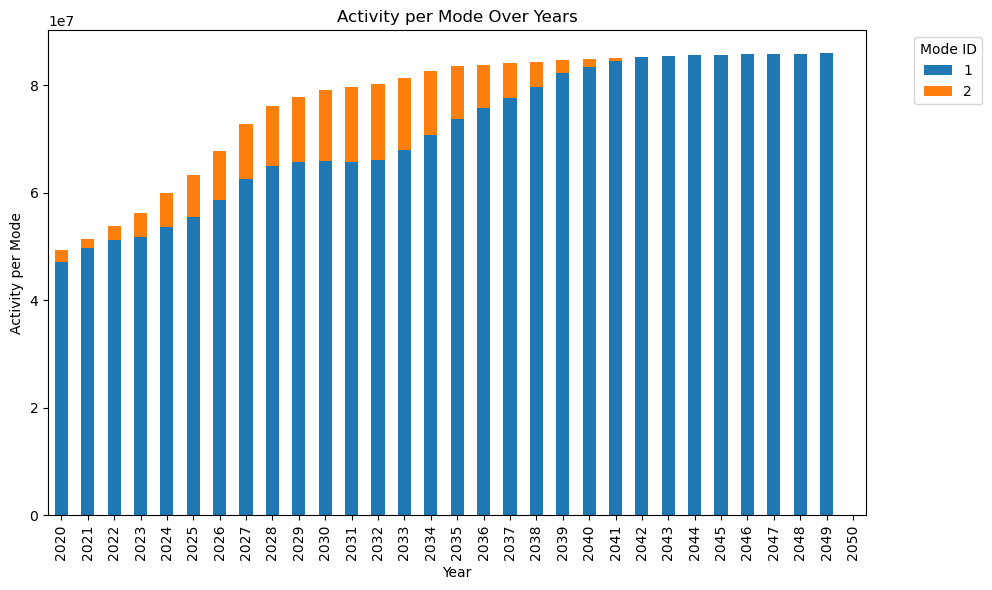

In [200]:

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
mode_ids = list(set(mode_id for _, mode_id in activity_per_mode.keys()))

# Prepare data for stacked bar plot
data = {year: [activity_per_mode.get((year, mode_id), 0) for mode_id in mode_ids] for year in years}
df = pd.DataFrame(data, index=mode_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Activity per Mode')
ax.set_title('Activity per Mode Over Years')
plt.legend(title='Mode ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



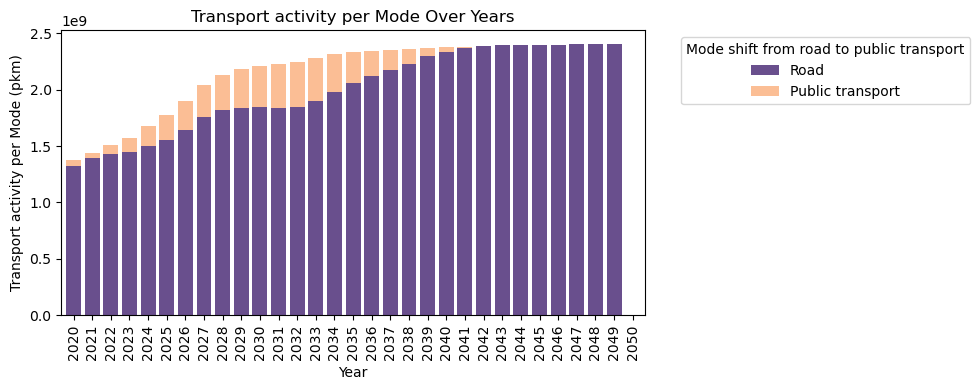

In [201]:
mode_names = {1: "Road", 2: "Public transport"}

fig, ax = plt.subplots(figsize=(10, 4))

years = range(y_init, Y_end + 1)
mode_ids = list(set(mode_id for _, mode_id in activity_per_mode_pkm.keys()))

# Prepare data for stacked bar plot
data = {year: [activity_per_mode_pkm.get((year, mode_id), 0) for mode_id in mode_ids] for year in years}
df = pd.DataFrame(data, index=mode_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax, color = ["#432371", "#faae7b"], alpha=0.8, width=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Transport activity per Mode (pkm)')
ax.set_title('Transport activity per Mode Over Years')
ax.legend(
    labels=[mode_names[mode_id] for mode_id in mode_ids],
    title='Mode shift from road to public transport',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_activity_per_mode_pkm.png"), transparent=True)
plt.show()

In [202]:
print(mode_list.keys())

dict_keys([1, 2])


In [203]:
geometric_element_list = input_data["GeographicElement"]

geometric_element_list_by_id = {item["id"]: item for item in geometric_element_list}
geometric_element_list_by_name = {item["name"]: item for item in geometric_element_list}

fuel_list = input_data["Fuel"]
fuel_list_by_id = {item["id"]: item for item in fuel_list}
fuel_list_by_name = {item["name"]: item for item in fuel_list}

# Development of detour time by edge
def get_detour_time_by_edge(by_geom = False, by_fuel = False, geoms = [], fuels = []):
    if by_geom:
        geom_list = geoms
    else:
        geom_list = geometric_element_list_by_name.keys()

    if by_fuel:
        fuels_list = fuels
    else:
        fuels_list = fuel_list.keys()

    detour_time_by_edge = {}
    detour_time_at_place = {}
    for y in range(y_init, Y_end + 1):
        for e in geom_list:
            for fuel in fuels_list:
                tot_veh = 0
                fuel_id = fuel_list_by_name[fuel]["id"]
                for r in odpair_list.keys():
                    # if (y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"]) in detour_time.keys():
                    fueling_vehs = n_fueling[(y, (1, r, odpair_list[r]["path_id"], geometric_element_list_by_name[e]["id"]), fuel_id)]
                        # print(r, fueling_vehs)
                    tot_veh = tot_veh + fueling_vehs
                        # total_detour_time_per_y = sum(detour_time[(y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"])])
                        # detour_time_by_edge[(y, geometric_element_list_by_name[e]["id"], fuel)] = total_detour_time_per_y
                print (y, tot_veh)
                total_detour_time_per_y = sum(detour_time[(y, (p, r, odpair_list[r]["path_id"], geometric_element_list_by_name[e]["id"]), fuel_list_by_name[fuel]["id"])] for r in odpair_list.keys() for p in product_list.keys() if (y, (p, r, odpair_list[r]["path_id"], geometric_element_list_by_name[e]["id"]), fuel_list_by_name[fuel]["id"]) in detour_time.keys())
                if not tot_veh == 0:

                    detour_time_av = total_detour_time_per_y / tot_veh
                else:
                    detour_time_av = 0
                detour_time_by_edge[(y, geometric_element_list_by_name[e]["id"], fuel)] = total_detour_time_per_y
                detour_time_at_place[(y, geometric_element_list_by_name[e]["id"], fuel)] = detour_time_av
    return detour_time_by_edge, detour_time_at_place

In [204]:
# electricity 
# getting detour time 
detour_time_by_edge, detour_time_at_place = get_detour_time_by_edge(by_geom=True, by_fuel=True, geoms=["ES211"], fuels=["electricity"])

for k in detour_time_at_place.keys():
    print(k, detour_time_at_place[k])
print(detour_time_at_place)

NameError: name 'n_fueling' is not defined

In [554]:
# diesel
detour_time_by_edge, detour_time_by_place = get_detour_time_by_edge(by_geom=True, by_fuel=True, geoms=["ES211"], fuels=["diesel"])

for k in detour_time_at_place.keys():
    print(k, detour_time_at_place[k])
print(detour_time_at_place)

2020 0
2021 0
2022 0
2023 0
2024 0
2025 0
2026 0
2027 0
2028 0
2029 0
2030 0
2031 0
2032 0
2033 0
2034 0
2035 0
2036 0
2037 0
2038 0
2039 0
2040 0
2041 0
2042 0
2043 0
2044 0
2045 0
2046 0
2047 0
2048 0
2049 0
2050 0
(2020, 12, 'electricity') 0
(2021, 12, 'electricity') 0
(2022, 12, 'electricity') 0
(2023, 12, 'electricity') 0
(2024, 12, 'electricity') 0
(2025, 12, 'electricity') 0
(2026, 12, 'electricity') 0
(2027, 12, 'electricity') 0
(2028, 12, 'electricity') 0
(2029, 12, 'electricity') 0
(2030, 12, 'electricity') 0
(2031, 12, 'electricity') 0
(2032, 12, 'electricity') 0
(2033, 12, 'electricity') 0
(2034, 12, 'electricity') 0
(2035, 12, 'electricity') 0
(2036, 12, 'electricity') 0
(2037, 12, 'electricity') 0
(2038, 12, 'electricity') 0
(2039, 12, 'electricity') 0
(2040, 12, 'electricity') 0
(2041, 12, 'electricity') 0
(2042, 12, 'electricity') 0
(2043, 12, 'electricity') 0
(2044, 12, 'electricity') 0
(2045, 12, 'electricity') 0
(2046, 12, 'electricity') 0
(2047, 12, 'electricity') 0

In [555]:
geometric_element_list = input_data["GeographicElement"]

geometric_element_list_by_id = {item["id"]: item for item in geometric_element_list}
geometric_element_list_by_name = {item["name"]: item for item in geometric_element_list}

fuel_list = input_data["Fuel"]
fuel_list_by_id = {item["id"]: item for item in fuel_list}
fuel_list_by_name = {item["name"]: item for item in fuel_list}

# Development of detour time by edge
def get_nb_vehs(by_geom = False, by_fuel = False, geoms = [], fuels = []):
    if by_geom:
        geom_list = geoms
    else:
        geom_list = geometric_element_list_by_name.keys()

    if by_fuel:
        fuels_list = fuels
    else:
        fuels_list = fuel_list.keys()

    nb_vehs_fueling = {}
    detour_time_at_place = {}
    for y in range(y_init, Y_end + 1):
        for e in geom_list:
            for fuel in fuels_list:
                tot_veh = 0

                for r in odpair_list.keys():
                    if (y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"]) in detour_time.keys():
                        fueling_vehs = sum(n_fueling[(y, (1, r, odpair_list[r]["path_id"], e), tv)] for tv in techvehicle_list.keys() for e in geographic_element_list.keys() if (y, (1, r, odpair_list[r]["path_id"], e), tv) in n_fueling.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in fuels_list)
                        # print(r, fueling_vehs)
                        tot_veh = tot_veh + fueling_vehs
                        # total_detour_time_per_y = sum(detour_time[(y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"])])
                        # detour_time_by_edge[(y, geometric_element_list_by_name[e]["id"], fuel)] = total_detour_time_per_y
                print (y, tot_veh)
                
                nb_vehs_fueling[(y, geometric_element_list_by_name[e]["id"], fuel)] = tot_veh
    return nb_vehs_fueling

In [556]:
nb_vehs_fueling = get_nb_vehs(by_geom=True, by_fuel=True, geoms=["ES211"], fuels=["electricity"])
print(nb_vehs_fueling)

2020 0
2021 0
2022 0
2023 0
2024 0
2025 0
2026 0
2027 0
2028 0
2029 0
2030 0
2031 0
2032 0
2033 0
2034 0
2035 0
2036 0
2037 0
2038 0
2039 0
2040 0
2041 0
2042 0
2043 0
2044 0
2045 0
2046 0
2047 0
2048 0
2049 0
2050 0
{(2020, 12, 'electricity'): 0, (2021, 12, 'electricity'): 0, (2022, 12, 'electricity'): 0, (2023, 12, 'electricity'): 0, (2024, 12, 'electricity'): 0, (2025, 12, 'electricity'): 0, (2026, 12, 'electricity'): 0, (2027, 12, 'electricity'): 0, (2028, 12, 'electricity'): 0, (2029, 12, 'electricity'): 0, (2030, 12, 'electricity'): 0, (2031, 12, 'electricity'): 0, (2032, 12, 'electricity'): 0, (2033, 12, 'electricity'): 0, (2034, 12, 'electricity'): 0, (2035, 12, 'electricity'): 0, (2036, 12, 'electricity'): 0, (2037, 12, 'electricity'): 0, (2038, 12, 'electricity'): 0, (2039, 12, 'electricity'): 0, (2040, 12, 'electricity'): 0, (2041, 12, 'electricity'): 0, (2042, 12, 'electricity'): 0, (2043, 12, 'electricity'): 0, (2044, 12, 'electricity'): 0, (2045, 12, 'electricity'): 0, (2